# Проект ML-классификации нефтепродуктов по показателями качества по классам ТН ВЭД (на примере Автомобильных бензинов)

### Импорт выборки нефтепродуктов 
значения ПК сгенерированы случайным образом в пределах значений реальных показателей из паспортов качества
Класс ТН ВЭД определен экспертно
Объем выборки - 1017 записей

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [5]:
data = pd.read_excel("TNVED_test.xlsx")
data.head()

,ID,GroupName,Marka,Единица измерения базовая,EcolKlass,OChIM,OChMM,Sod_Pb,Sod_S,Sod_h-hexan,TNVED,Код ОКПД2,Наименование ОКПД2,Код ТНВЭД,Partia,Quality_Passport,Код ЕСН,Наименование ru,KlassNP_Code,KlassNP_Name
0,1,Бензин автомобильный,АИ-80,Т,NaN,80.0,76.6,0.0,3.9,0.6,2710124120,19.20.21.111,Бензин автомобильный с октановым числом не мен...,NaN,10095503,134058,251123725,Бензин автомобильный Нормаль-80,1010100,Бензины автомобильные 80 вне классов
1,2,Бензин автомобильный,АИ-80-К5,Т,5.0,84.0,77.3,0.0,3.0,0.6,2710124120,19.20.21.115,Бензин автомобильный с октановым числом не мен...,NaN,10095498,81461,251191304,Бензин Нормаль-80 кл.5,1010500,Бензины автомобильные 80 класса К5
2,3,Бензин автомобильный,АИ-100-К5,Т,5.0,100.6,88.1,0.0,5.1,0.0,2710124900,19.20.21.145,Бензин автомобильный с октановым числом более ...,2.710125e+09,10095508,120864,251194222,Автобензин G-DRIVE 100 (АИ-100-К5),1050500,Бензины автомобильные 100 и более класса К5
3,4,Бензин автомобильный,АИ-92-К2,Т,2.0,91.6,85.0,0.0,3.1,0.9,2710124120,NaN,NaN,NaN,10095513,219758,251123816,Бензин Регуляр Евро-92 в.III кл.F э.кл.2,1020200,Бензины автомобильные 92 класса К2
4,5,Бензин автомобильный,АИ-92-К5,Т,5.0,91.8,85.2,0.0,3.3,0.8,2710124120,19.20.21.125,Бензин автомобильный с октановым числом более ...,NaN,10095518,254962,251194247,Бензин Регуляр-92 (АИ-92-К5) (СургутЗСК),1020500,Бензины автомобильные 92 класса К5


In [32]:
# в целях упрощения модели сократим количество атрибутов
data = data [['GroupName', 'Marka','EcolKlass','OChIM','OChMM',
          'Sod_Pb', 'Sod_S', 'Sod_h-hexan', 'TNVED']]

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017 entries, 0 to 1016
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GroupName    1017 non-null   object 
 1   Marka        1017 non-null   object 
 2   EcolKlass    846 non-null    float64
 3   OChIM        1017 non-null   float64
 4   OChMM        1017 non-null   float64
 5   Sod_Pb       1017 non-null   float64
 6   Sod_S        1017 non-null   float64
 7   Sod_h-hexan  1017 non-null   float64
 8   TNVED        1017 non-null   int64  
dtypes: float64(6), int64(1), object(2)
memory usage: 71.6+ KB


## Анализ выборки и подготовка данных

In [9]:
data.describe()

,ID,EcolKlass,OChIM,OChMM,Sod_Pb,Sod_S,Sod_h-hexan,TNVED
count,1017.000000,846.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1.017000e+03
mean,509.000000,4.361702,92.923795,84.670698,0.000245,4.995379,0.551032,2.710124e+09
std,293.726914,1.100467,5.322866,3.406615,0.001924,1.143773,0.295173,3.044491e+02
min,1.000000,2.000000,75.700000,73.400000,0.000000,3.000000,0.000000,2.710124e+09
25%,255.000000,4.000000,91.700000,84.400000,0.000000,4.100000,0.500000,2.710124e+09
50%,509.000000,5.000000,93.000000,85.100000,0.000000,4.900000,0.600000,2.710124e+09
75%,763.000000,5.000000,96.000000,85.900000,0.000000,6.000000,0.800000,2.710124e+09
max,1017.000000,5.000000,100.700000,89.800000,0.020000,7.000000,0.900000,2.710125e+09


In [10]:
#анализ атрибута TNVED
data.TNVED.value_counts()

2710124130    307
2710124120    248
2710124500    231
2710124900    170
2710124110     49
2710125100     12
Name: TNVED, dtype: int64

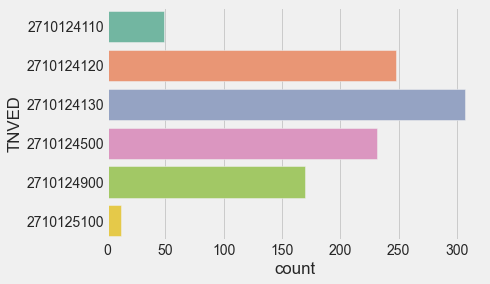

In [21]:
sns_plot = sns.countplot(y ='TNVED', data=data, palette = 'Set2')
fig = sns_plot.get_figure()

In [22]:
#анализ атрибута GroupName
data.GroupName.value_counts()

Бензин автомобильный    1017
Name: GroupName, dtype: int64

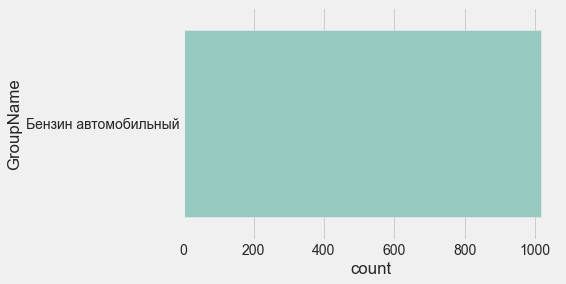

In [23]:
sns_plot = sns.countplot(y ='GroupName', data=data, palette = 'Set3')
fig = sns_plot.get_figure()

In [24]:
#анализ атрибута Marka
data.Marka.value_counts()

АИ-92-К5     225
АИ-95-К5     189
АИ-92-К2     108
АИ-98-К5      81
АИ-80         72
АИ-100-К5     63
АИ-95         54
АИ-80-К5      36
АИ-95-К4      36
АИ-92-К4      27
АИ-92         27
АИ-98-К4      18
АИ-98         18
АИ-98-К2       9
АИ-95-К3       9
АИ-92-К3       9
АИ-95-К2       9
АИ-80-К4       9
АИ-98-К3       9
АИ-80-К3       9
Name: Marka, dtype: int64

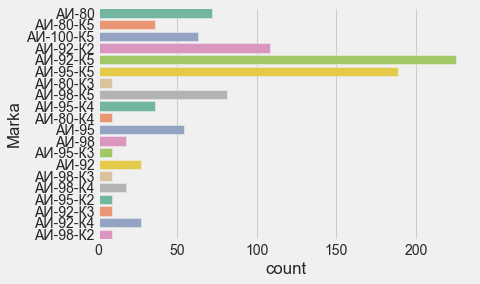

In [28]:
sns_plot = sns.countplot(y ='Marka', data=data, palette = 'Set2')
fig = sns_plot.get_figure()

In [34]:
df = data.copy()
df.head()

,GroupName,Marka,EcolKlass,OChIM,OChMM,Sod_Pb,Sod_S,Sod_h-hexan,TNVED
0,Бензин автомобильный,АИ-80,NaN,80.0,76.6,0.0,3.9,0.6,2710124120
1,Бензин автомобильный,АИ-80-К5,5.0,84.0,77.3,0.0,3.0,0.6,2710124120
2,Бензин автомобильный,АИ-100-К5,5.0,100.6,88.1,0.0,5.1,0.0,2710124900
3,Бензин автомобильный,АИ-92-К2,2.0,91.6,85.0,0.0,3.1,0.9,2710124120
4,Бензин автомобильный,АИ-92-К5,5.0,91.8,85.2,0.0,3.3,0.8,2710124120


In [39]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [41]:
# преобразуем данные категорий типа object в тип integer с помощью LabelEncoder и добавим новые столбцы в df
df = df.assign(Group_Num = le.fit_transform(df.GroupName))
df = df.assign(Marka_Num = le.fit_transform(df.Marka))
df = df.assign(TNVED_Num = le.fit_transform(df.TNVED))
df.head()

,GroupName,Marka,EcolKlass,OChIM,OChMM,Sod_Pb,Sod_S,Sod_h-hexan,TNVED,Group_Num,Marka_Num,TNVED_Num
0,Бензин автомобильный,АИ-80,NaN,80.0,76.6,0.0,3.9,0.6,2710124120,0,1,1
1,Бензин автомобильный,АИ-80-К5,5.0,84.0,77.3,0.0,3.0,0.6,2710124120,0,4,1
2,Бензин автомобильный,АИ-100-К5,5.0,100.6,88.1,0.0,5.1,0.0,2710124900,0,0,4
3,Бензин автомобильный,АИ-92-К2,2.0,91.6,85.0,0.0,3.1,0.9,2710124120,0,6,1
4,Бензин автомобильный,АИ-92-К5,5.0,91.8,85.2,0.0,3.3,0.8,2710124120,0,9,1


In [60]:
#заменим пустые значения в EcolKlass на 0.0
df['EcolKlass'] = df['EcolKlass']. fillna (0)

In [61]:
#уберем нечисловые столбцы
df1 = df.drop(columns = ['GroupName','Marka','TNVED'])
df1.head()

,EcolKlass,OChIM,OChMM,Sod_Pb,Sod_S,Sod_h-hexan,Group_Num,Marka_Num,TNVED_Num
0,0.0,80.0,76.6,0.0,3.9,0.6,0,1,1
1,5.0,84.0,77.3,0.0,3.0,0.6,0,4,1
2,5.0,100.6,88.1,0.0,5.1,0.0,0,0,4
3,2.0,91.6,85.0,0.0,3.1,0.9,0,6,1
4,5.0,91.8,85.2,0.0,3.3,0.8,0,9,1


In [62]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017 entries, 0 to 1016
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   EcolKlass    1017 non-null   float64
 1   OChIM        1017 non-null   float64
 2   OChMM        1017 non-null   float64
 3   Sod_Pb       1017 non-null   float64
 4   Sod_S        1017 non-null   float64
 5   Sod_h-hexan  1017 non-null   float64
 6   Group_Num    1017 non-null   int32  
 7   Marka_Num    1017 non-null   int32  
 8   TNVED_Num    1017 non-null   int64  
dtypes: float64(6), int32(2), int64(1)
memory usage: 63.7 KB


(9.5, -0.5)

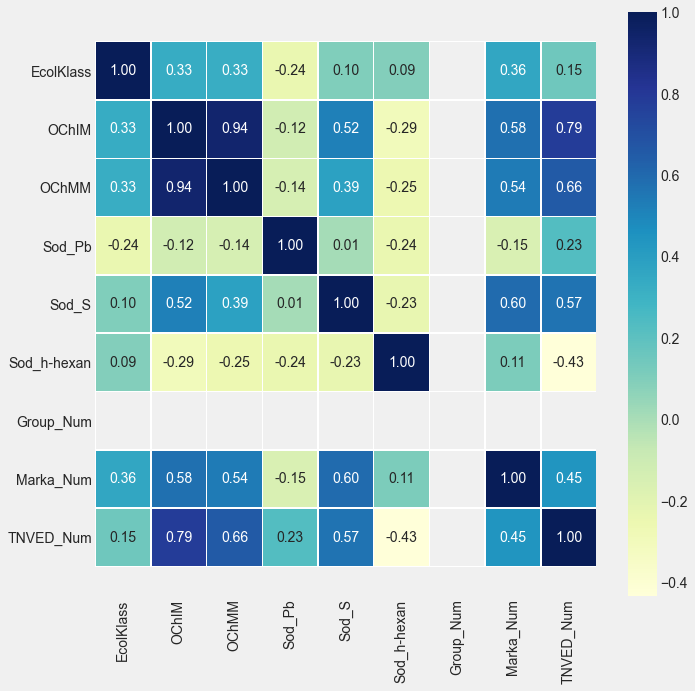

In [63]:
# Построим корреляционную матрицу между показателями качества НП и кодом ТН ВЭД
corr_matrix = df1.corr()
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [64]:
# Разделим выборку на обучающую и тестовую в соотношении 80:20
from sklearn.model_selection import train_test_split
X = df1.drop(columns=['TNVED_Num'])
y = df1['TNVED_Num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## 🤖 Обучение и оценка точности моделей

In [70]:
# процедура для сравнительной оценки точности моделей
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Результат теста:\n================================================")
        print(f"Оценка точности: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Отчет о классификации:\n{clf_report}")
        print("_______________________________________________")
        print(f"Матрица ошибок: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Результат теста:\n================================================")        
        print(f"Оценка точности: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Отчет о классификации:\n{clf_report}")
        print("_______________________________________________")
        print(f"Матрица ошибок: \n {confusion_matrix(y_test, pred)}\n")

### 1. Логистическая регрессия

In [71]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Результат теста:
Оценка точности: 67.04%
_______________________________________________
Отчет о классификации:
                   0           1           2           3           4  \
precision   0.666667    0.678862    0.689320    0.605809    0.761468   
recall      0.105263    0.802885    0.579592    0.820225    0.614815   
f1-score    0.181818    0.735683    0.629712    0.696897    0.680328   
support    38.000000  208.000000  245.000000  178.000000  135.000000   

                  5  accuracy   macro avg  weighted avg  
precision  0.600000  0.670357    0.667021      0.678293  
recall     0.333333  0.670357    0.542685      0.670357  
f1-score   0.428571  0.670357    0.558835      0.656777  
support    9.000000  0.670357  813.000000    813.000000  
_______________________________________________
Матрица ошибок: 
 [[  4  34   0   0   0   0]
 [  2 167  35   1   1   2]
 [  0  42 142  49  12   0]
 [  0   0  20 146  12   0]
 [  0   0   7  45  83   0]
 [  0   3   2   0   1   3]]

Результ

In [74]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Логистическая регрессия", train_score, test_score]], 
                          columns=['Модель', 'Точность на обуч. %', 'Точность на тестовой %'])
results_df

,Модель,Точность на обуч. %,Точность на тестовой %
0,Логистическая регрессия,67.03567,68.137255


### 2. Модель K-ближайших соседей

In [72]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

Результат теста:
Оценка точности: 95.82%
_______________________________________________
Отчет о классификации:
                   0           1           2           3           4  \
precision   0.942857    0.942857    0.962963    0.971751    0.978261   
recall      0.868421    0.951923    0.955102    0.966292    1.000000   
f1-score    0.904110    0.947368    0.959016    0.969014    0.989011   
support    38.000000  208.000000  245.000000  178.000000  135.000000   

                  5  accuracy   macro avg  weighted avg  
precision  0.700000   0.95818    0.916448      0.958433  
recall     0.777778   0.95818    0.919919      0.958180  
f1-score   0.736842   0.95818    0.917560      0.958180  
support    9.000000   0.95818  813.000000    813.000000  
_______________________________________________
Матрица ошибок: 
 [[ 33   5   0   0   0   0]
 [  2 198   5   0   0   3]
 [  0   6 234   5   0   0]
 [  0   0   3 172   3   0]
 [  0   0   0   0 135   0]
 [  0   1   1   0   0   7]]

Результ

In [75]:
test_score = accuracy_score(y_test, knn_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, knn_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["K-ближайших соседей", train_score, test_score]], 
                          columns=['Модель', 'Точность на обуч. %', 'Точность на тестовой %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Модель,Точность на обуч. %,Точность на тестовой %
0,Логистическая регрессия,67.035670,68.137255
1,K-ближайших соседей,95.817958,93.627451


### 3. Модель опорных векторов

In [76]:
from sklearn.svm import SVC


svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)
svm_clf.fit(X_train, y_train)

print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

Результат теста:
Оценка точности: 94.83%
_______________________________________________
Отчет о классификации:
                   0           1           2           3           4    5  \
precision   0.945946    0.952607    0.952381    0.981595    0.900000  0.0   
recall      0.921053    0.966346    0.979592    0.898876    1.000000  0.0   
f1-score    0.933333    0.959427    0.965795    0.938416    0.947368  0.0   
support    38.000000  208.000000  245.000000  178.000000  135.000000  9.0   

           accuracy   macro avg  weighted avg  
precision  0.948339    0.788755      0.939293  
recall     0.948339    0.794311      0.948339  
f1-score   0.948339    0.790723      0.942903  
support    0.948339  813.000000    813.000000  
_______________________________________________
Матрица ошибок: 
 [[ 35   3   0   0   0   0]
 [  2 201   5   0   0   0]
 [  0   2 240   3   0   0]
 [  0   0   3 160  15   0]
 [  0   0   0   0 135   0]
 [  0   5   4   0   0   0]]

Результат теста:
Оценка точности

C:\Users\iks_e\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\iks_e\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\iks_e\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\iks_e\anaconda3\lib\site-packages\sklearn\metr

In [77]:
test_score = accuracy_score(y_test, svm_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, svm_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Опорных векторов", train_score, test_score]], 
                          columns=['Модель', 'Точность на обуч. %', 'Точность на тестовой %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Модель,Точность на обуч. %,Точность на тестовой %
0,Логистическая регрессия,67.035670,68.137255
1,K-ближайших соседей,95.817958,93.627451
2,Опорных векторов,94.833948,93.627451


### 4. Классификация решаюших деревьев

In [78]:
from sklearn.tree import DecisionTreeClassifier


tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Результат теста:
Оценка точности: 100.00%
_______________________________________________
Отчет о классификации:
              0      1      2      3      4    5  accuracy  macro avg  \
precision   1.0    1.0    1.0    1.0    1.0  1.0       1.0        1.0   
recall      1.0    1.0    1.0    1.0    1.0  1.0       1.0        1.0   
f1-score    1.0    1.0    1.0    1.0    1.0  1.0       1.0        1.0   
support    38.0  208.0  245.0  178.0  135.0  9.0       1.0      813.0   

           weighted avg  
precision           1.0  
recall              1.0  
f1-score            1.0  
support           813.0  
_______________________________________________
Матрица ошибок: 
 [[ 38   0   0   0   0   0]
 [  0 208   0   0   0   0]
 [  0   0 245   0   0   0]
 [  0   0   0 178   0   0]
 [  0   0   0   0 135   0]
 [  0   0   0   0   0   9]]

Результат теста:
Оценка точности: 100.00%
_______________________________________________
Отчет о классификации:
              0     1     2     3     4    5  ac

In [79]:
test_score = accuracy_score(y_test, tree_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, tree_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Решающие деревья", train_score, test_score]], 
                          columns=['Модель', 'Точность на обуч. %', 'Точность на тестовой %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Модель,Точность на обуч. %,Точность на тестовой %
0,Логистическая регрессия,67.035670,68.137255
1,K-ближайших соседей,95.817958,93.627451
2,Опорных векторов,94.833948,93.627451
3,Решающие деревья,100.000000,100.000000


### 5. Модель случайного леса

In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Результат теста:
Оценка точности: 100.00%
_______________________________________________
Отчет о классификации:
              0      1      2      3      4    5  accuracy  macro avg  \
precision   1.0    1.0    1.0    1.0    1.0  1.0       1.0        1.0   
recall      1.0    1.0    1.0    1.0    1.0  1.0       1.0        1.0   
f1-score    1.0    1.0    1.0    1.0    1.0  1.0       1.0        1.0   
support    38.0  208.0  245.0  178.0  135.0  9.0       1.0      813.0   

           weighted avg  
precision           1.0  
recall              1.0  
f1-score            1.0  
support           813.0  
_______________________________________________
Матрица ошибок: 
 [[ 38   0   0   0   0   0]
 [  0 208   0   0   0   0]
 [  0   0 245   0   0   0]
 [  0   0   0 178   0   0]
 [  0   0   0   0 135   0]
 [  0   0   0   0   0   9]]

Результат теста:
Оценка точности: 99.51%
_______________________________________________
Отчет о классификации:
              0     1          2          3     4

In [81]:
test_score = accuracy_score(y_test, tree_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, tree_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Случайный лес", train_score, test_score]], 
                          columns=['Модель', 'Точность на обуч. %', 'Точность на тестовой %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Модель,Точность на обуч. %,Точность на тестовой %
0,Логистическая регрессия,67.035670,68.137255
1,K-ближайших соседей,95.817958,93.627451
2,Опорных векторов,94.833948,93.627451
3,Решающие деревья,100.000000,100.000000
4,Случайный лес,100.000000,100.000000


## Вывод

Модели Решающих деревьев и Случайного леса даже при базовых параметрах дают 100% предсказательную точность классификации нефтепродуктов (Бензинов автомобильных) по ТНВЭД на данной выборке.